In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('hard_old_drop_data.csv')
df = df[['artist_name', 'artist_popularity', 'album_name', 'release_date', 'track_number',
       'track_name', 'track_popularity', 'danceability', 'energy', 'key',
       'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'loudness', 'mode']]
df = df[df.track_popularity > 0]
df

,artist_name,artist_popularity,album_name,release_date,track_number,track_name,track_popularity,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,loudness,mode
0,BLACKPINK,86,Pink Venom,2022-08-19,1,Pink Venom,76,0.794,0.719,0,0.0761,0.01190,0.000000,0.2760,0.690,90.016,186964,4,-7.227,1
1,BLACKPINK,86,BORN PINK,2022-09-15,2,Shut Down,79,0.818,0.690,0,0.0454,0.00327,0.000000,0.1860,0.688,110.071,175889,3,-5.119,1
2,BLACKPINK,86,BORN PINK,2022-09-15,3,Typa Girl,56,0.919,0.637,7,0.1010,0.06670,0.000000,0.6510,0.517,131.955,179173,4,-6.388,1
3,BLACKPINK,86,BORN PINK,2022-09-15,4,Yeah Yeah Yeah,66,0.729,0.588,1,0.0359,0.00574,0.000003,0.0614,0.639,124.019,178924,4,-6.654,0
4,BLACKPINK,86,BORN PINK,2022-09-15,5,Hard to Love,50,0.645,0.767,5,0.0420,0.00525,0.000000,0.1770,0.438,104.975,162570,4,-5.151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,BIGBANG,66,Special Edition 'Still Alive',2012-06-03,8,Ego,39,0.794,0.788,10,0.0404,0.02090,0.000000,0.1310,0.842,120.995,205200,4,-3.853,0
1501,BIGBANG,66,ALIVE,2012-02-29,3,Love Dust (사랑 먼지),45,0.663,0.757,0,0.0857,0.03370,0.000000,0.2670,0.560,129.888,231816,4,-5.336,1
1502,BIGBANG,66,ALIVE,2012-02-29,1,Intro (Alive),38,0.641,0.914,10,0.2210,0.01050,0.000000,0.1940,0.730,110.080,47643,4,-4.549,0
1503,BIGBANG,66,ALIVE,2012-02-29,5,Ain't No Fun (재미없어),42,0.766,0.557,9,0.0491,0.00611,0.000000,0.0818,0.747,124.027,222186,4,-6.869,0


## Feature Selection

### Categorical

- 'artist_name' : aritst_popularity로 특성을 설명할 수 있기 때문에 제거했습니다.
- 'album_name' : release_date으로 특성을 설명할 수 있기 때문에 제거했습니다.
- 'track_name' : 다른 속성 값들의 조합에 의해 곡 특성이 모두 설명되었으므로 제거했습니다.
- 'mode' : 0 혹은 1로, 곡의 단조/장조를 구분하고 있어 그대로 사용했습니다.

### Float

> Spotify에서 자체적으로 곡의 특성을 분석하고 있는 결과물입니다. 총 7가지 특성에 대해 곡의 특성을 평가하고 있으며, 0 에서 1 사이의 값을 가집니다. Modeling 이후 값에 대한 해석의 여지를 확보하기 위하여 Scaling 없이 그대로 Machine Learning에 투입했습니다.
> 
> - 'danceability',
> - 'energy'
> - 'speechiness'
> - 'acousticness'
> - 'instrumentalness'
> - 'liveness'
> - 'valence'

### Integer

> 전통적으로 곡을 분류할 수 있는 속성입니다. 음정, 속도, 곡의 길이, 박자표 등 곡에서 객관적으로 추출할 수 있는 요소들입니다. Modeling 이후 값에 대한 해석의 여지를 확보하기 위하여 Scaling 없이 그대로 Machine Learning에 투입했습니다.
> 
> - 'key'
> - 'tempo'
> - 'duration_ms'
> - 'time_signature'

> 극단치가 예측에 영향을 미칠 요인이 없어 MinMax Scaling을 적용하여 Machine Learning에 투입했습니다.
> 
> - 'track_number'
> - 'artist_popularity'
> - 'release_year'

### Negative

> 음수 범위의 값을 가지고 있기 때문에 0 ~ 1 사이의 값을 가질 수 있도록 MinMax Scaling을 적용하여 Machine Learning에 투입했습니다.
> 
> - 'loudness'

### 파생변수 만들기

> release_date은 날짜 데이터로, Machine Learning에 그대로 투입할 수 없었습니다. 따라서 연/월/일로 정보로 분할한 후에 각각 MinMax Scaling를 진행했습니다.
> 
> - release_year
> - release_month
> - release_day

### Label

- 'track_popularity': 독립 변수들에 따른 영향을 확인하고자 하는 종속 변수입니다.

In [5]:
df['release_year'] = df.release_date.apply(lambda x: int(x[:4]))
df['release_month'] = df.release_date.apply(lambda x: int(x[5:7]))
df['release_day'] = df.release_date.apply(lambda x: int(x[8:10]))
df[['release_year', 'release_month', 'release_day']]

,release_year,release_month,release_day
0,2022,8,19
1,2022,9,15
2,2022,9,15
3,2022,9,15
4,2022,9,15
...,...,...,...
1500,2012,6,3
1501,2012,2,29
1502,2012,2,29
1503,2012,2,29


In [6]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness',
           'liveness', 'valence', 'track_number', 'artist_popularity', 'mode',
           'key', 'tempo', 'duration_ms', 'time_signature', 'loudness',
           'release_year', 'release_month', 'release_day']
label = 'track_popularity'

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc_features = ['track_number', 'artist_popularity', 
               'release_year', 'release_month', 'release_day']
nsc_features = ['danceability', 'energy', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'mode',
                'key', 'tempo', 'duration_ms', 'time_signature', 'loudness']

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[sc_features + [label]])
scaled_features = pd.DataFrame(scaler.transform(df[sc_features + [label]]), columns=df[sc_features + [label]].columns)
scaled_features

,track_number,artist_popularity,release_year,release_month,release_day,track_popularity
0,0.000000,0.758621,0.941176,0.636364,0.600000,0.815217
1,0.033333,0.758621,0.941176,0.727273,0.466667,0.847826
2,0.066667,0.758621,0.941176,0.727273,0.466667,0.597826
3,0.100000,0.758621,0.941176,0.727273,0.466667,0.706522
4,0.133333,0.758621,0.941176,0.727273,0.466667,0.532609
...,...,...,...,...,...,...
1329,0.233333,0.068966,0.352941,0.454545,0.066667,0.413043
1330,0.066667,0.068966,0.352941,0.090909,0.933333,0.478261
1331,0.000000,0.068966,0.352941,0.090909,0.933333,0.402174
1332,0.133333,0.068966,0.352941,0.090909,0.933333,0.445652


In [10]:
model_set = pd.concat([df.reset_index()[nsc_features], scaled_features[sc_features + [label]]], axis=1)
model_set

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,mode,key,tempo,duration_ms,time_signature,loudness,track_number,artist_popularity,release_year,release_month,release_day,track_popularity
0,0.794,0.719,0.0761,0.01190,0.000000,0.2760,0.690,1,0,90.016,186964,4,-7.227,0.000000,0.758621,0.941176,0.636364,0.600000,0.815217
1,0.818,0.690,0.0454,0.00327,0.000000,0.1860,0.688,1,0,110.071,175889,3,-5.119,0.033333,0.758621,0.941176,0.727273,0.466667,0.847826
2,0.919,0.637,0.1010,0.06670,0.000000,0.6510,0.517,1,7,131.955,179173,4,-6.388,0.066667,0.758621,0.941176,0.727273,0.466667,0.597826
3,0.729,0.588,0.0359,0.00574,0.000003,0.0614,0.639,0,1,124.019,178924,4,-6.654,0.100000,0.758621,0.941176,0.727273,0.466667,0.706522
4,0.645,0.767,0.0420,0.00525,0.000000,0.1770,0.438,1,5,104.975,162570,4,-5.151,0.133333,0.758621,0.941176,0.727273,0.466667,0.532609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,0.794,0.788,0.0404,0.02090,0.000000,0.1310,0.842,0,10,120.995,205200,4,-3.853,0.233333,0.068966,0.352941,0.454545,0.066667,0.413043
1330,0.663,0.757,0.0857,0.03370,0.000000,0.2670,0.560,1,0,129.888,231816,4,-5.336,0.066667,0.068966,0.352941,0.090909,0.933333,0.478261
1331,0.641,0.914,0.2210,0.01050,0.000000,0.1940,0.730,0,10,110.080,47643,4,-4.549,0.000000,0.068966,0.352941,0.090909,0.933333,0.402174
1332,0.766,0.557,0.0491,0.00611,0.000000,0.0818,0.747,0,9,124.027,222186,4,-6.869,0.133333,0.068966,0.352941,0.090909,0.933333,0.445652


# Modeling
- LGBM Regressor

In [11]:
!pip install shap
from lightgbm import LGBMRegressor as lr
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as MSE
import shap
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 12.0 MB/s eta 0:00:00


In [13]:
X = model_set[features]
y = model_set[label]
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=41)

# model train
model = lr()
model.fit(X_train, y_train)

# score
y_pred = model.predict(X_test)
RMSE = MSE(y_test, y_pred) ** 0.5
print('RMSE :', RMSE, sep=' ')

RMSE : 0.17658009387171283


 99%|===================| 1316/1334 [00:18<00:00]       

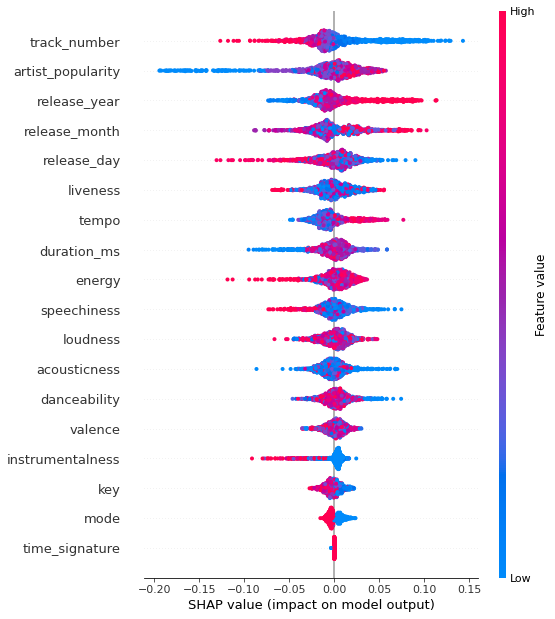

In [14]:
shap.initjs()
explainer = shap.TreeExplainer(model, X)
shap_values = explainer(X, check_additivity=False)

## summary plot
shap.summary_plot(shap_values)

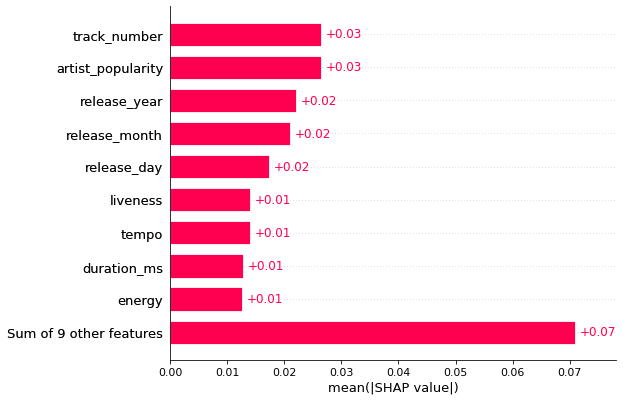

In [15]:
shap.plots.bar(shap_values, )

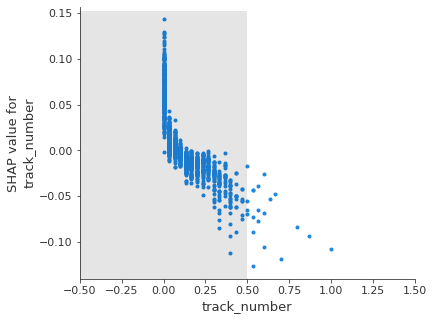

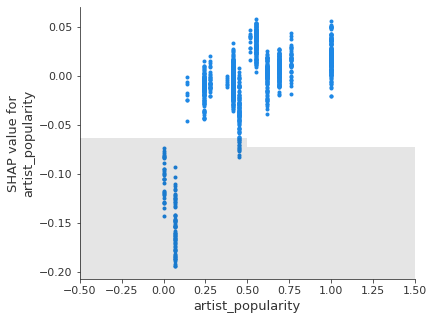

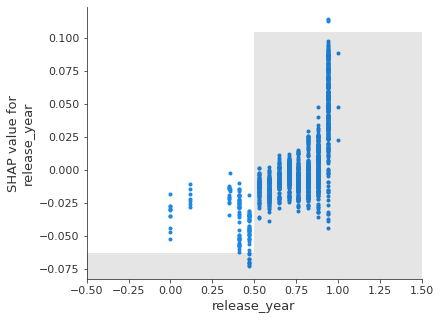

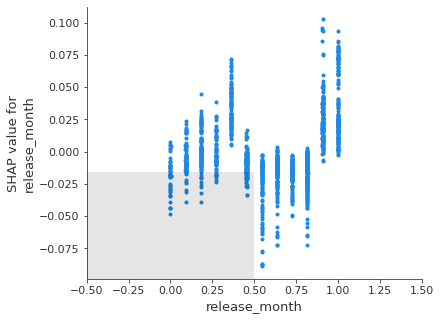

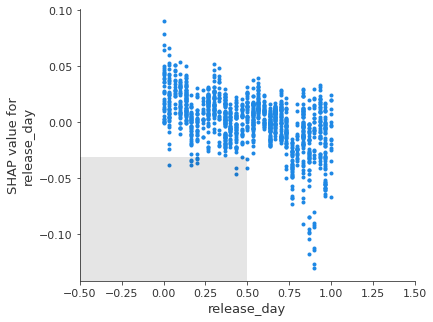

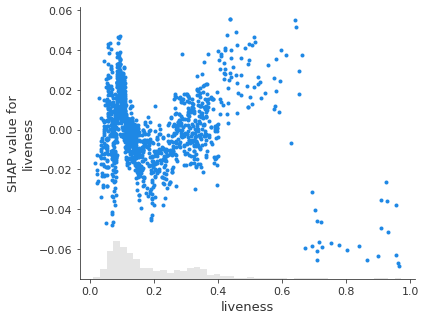

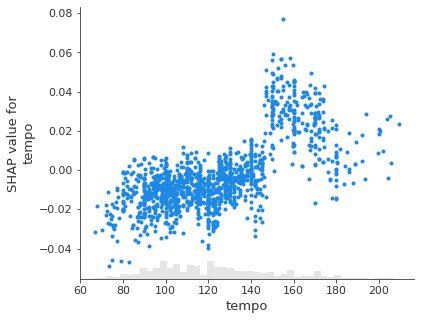

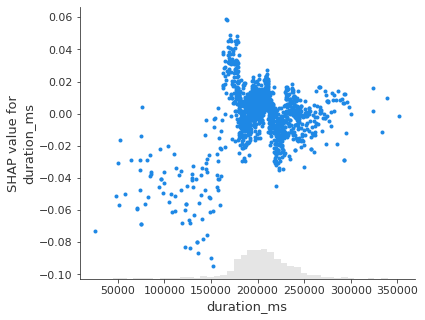

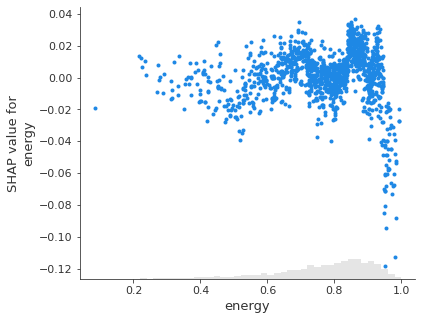

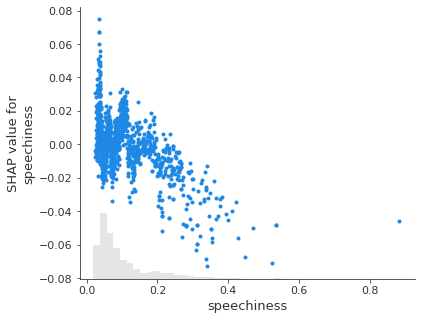

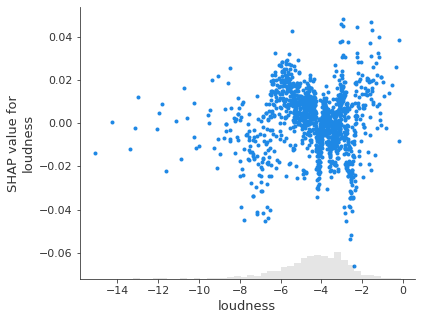

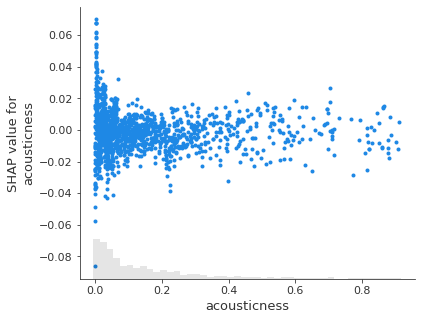

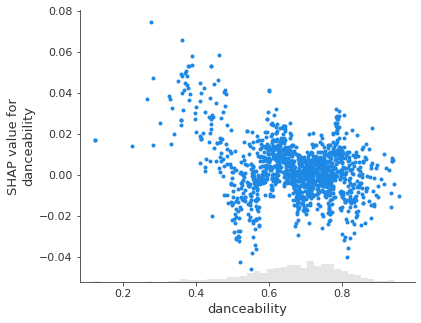

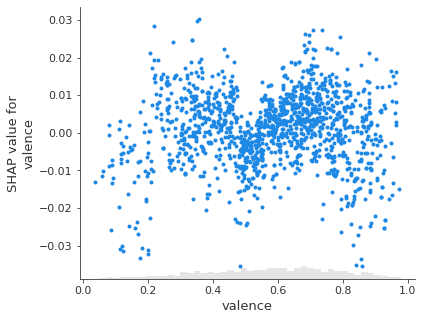

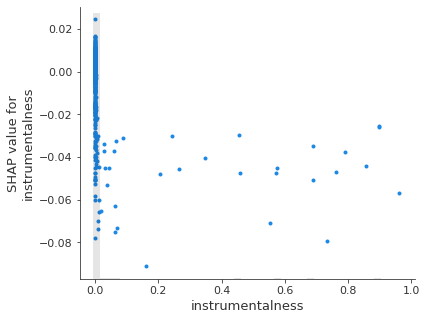

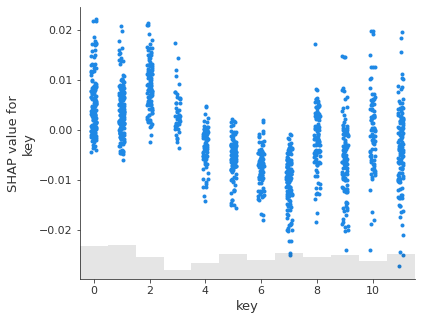

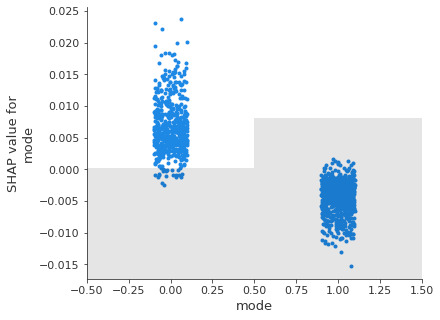

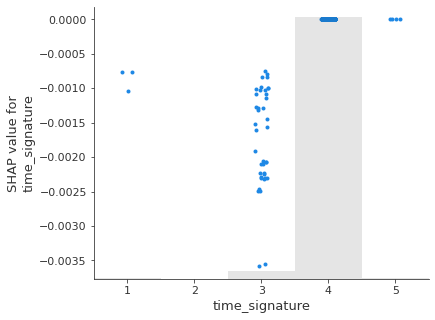

In [16]:
shap_imp = ['track_number', 'artist_popularity', 'release_year', 'release_month', 'release_day',
            'liveness', 'tempo', 'duration_ms', 'energy', 'speechiness',
            'loudness',  'acousticness', 'danceability', 'valence', 'instrumentalness',
            'key', 'mode', 'time_signature']

for col in shap_imp:
  shap.plots.scatter(shap_values[:, col])

## 곡 특성과의 관계성
### 곡 특성과 관계 없는 columns
- 'artist_popularity'
- 'track_number'
- 'release_day'
- 'release_month'
- 'release_year'

### 곡 특성과 관계 있는 columns
- 'duration_ms'
- 'energy'
- 'tempo'
- 'instrumentalness'
- 'speechiness'
- 'loudness'
- 'liveness'
- 'valence'
- 'acousticness'
- 'danceability'
- 'key'


### track_popularity에 유의한 영향이 없는 columns
- 'time_signature'

## Clustering
- 곡과 관계 없지만 target에 큰 영향을 미치는 feature들로 clustering 진행
- 대상 feature가 5 개 정도이므로 차원축소 없이 Clustering 진행

In [17]:
from sklearn.cluster import KMeans
import numpy as np

cluster_features = ['artist_popularity', 'track_number', 'release_day',
                   'release_month', 'release_year']

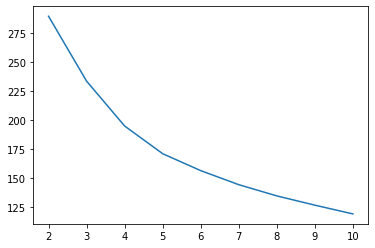

In [18]:
import seaborn as sns

def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        k_means = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        k_means.fit(X_features)
        inertias.append(k_means.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], X[cluster_features])

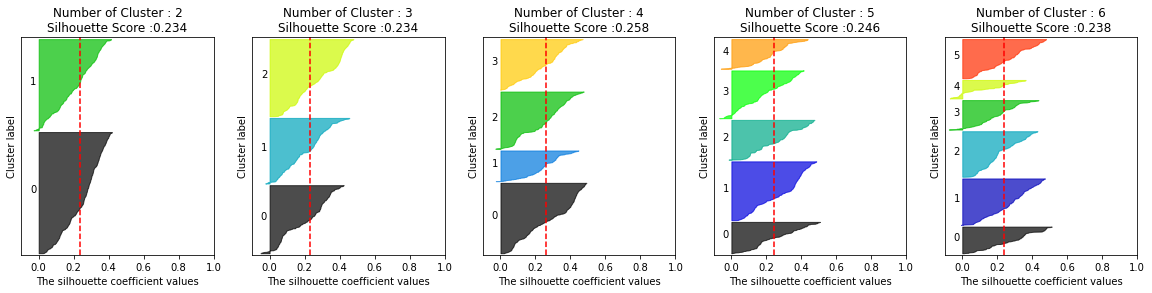

In [19]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5, 6], model_set[cluster_features])

In [20]:
# KMeans 인스턴스 생성
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=41)
kmeans.fit(model_set[cluster_features])

# KMeans 인스턴스의 라벨 출력
print(kmeans.labels_)
 
# 군집 별 개수 출력
model_set['cluster'] = kmeans.labels_
cluster_result = model_set.cluster.value_counts()
print(cluster_result)

[3 3 3 ... 1 1 1]
3    424
2    368
1    325
0    217
Name: cluster, dtype: int64


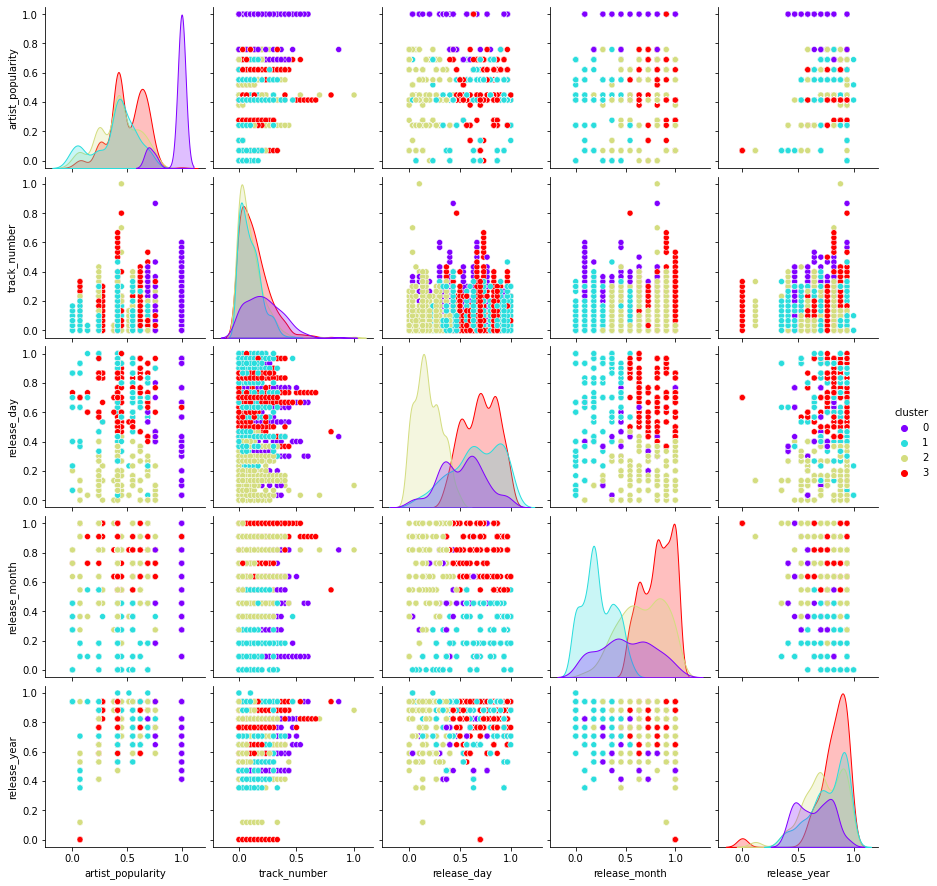

In [21]:
sns.pairplot(hue='cluster',
   palette='rainbow',
   data=model_set,
   vars=cluster_features)

<table>
  <tr>
    <th> cluster </th>
    <th> 0 </th> <th> 1 </th>
    <th> 2 </th> <th> 3 </th>
  </tr>
  <tr>
    <td> artist_popularity </td>
    <td> 최상위권 </td>
    <td> 중하위권 </td>
    <td> 중하위권 </td>
    <td> 중위권 </td>
  </tr>
  <tr>
    <td> track_number </td>
    <td colspan="7" align="center">
      track number는 유의미하게 군집화되지 않음
    </td>
  </tr>
  <tr>
    <td> release_day </td>
    <td> 월 중 </td>
    <td> 월 중 </td>
    <td> 월 초반 </td>
    <td> 월 후반 </td>
  </tr>
  <tr>
    <td> release_month </td>
    <td> 연중 </td>
    <td> 상반기 </td>
    <td> 연 초 제외 </td>
    <td> 하반기 </td>
  </tr>
  <tr>
    <td> release_year </td>
    <td colspan="7" align="center">
      release year는 유의미하게 군집화되지 않음
    </td>
  </tr>
</table>

In [22]:
df['cluster'] = model_set['cluster']
cluster_result = df.cluster.value_counts()
print(cluster_result)

3.0    386
2.0    349
1.0    306
0.0    122
Name: cluster, dtype: int64


# Cluster를 활용한 시각화

In [23]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.9 MB/s eta 0:00:00


In [25]:
# palette: pastel, deep, muted, bright, paster, dark, colorblind, husl, rainbow

song_features = ['duration_ms', 'energy', 'tempo', 'instrumentalness', 'speechiness',
                'loudness', 'liveness', 'valence', 'acousticness', 'danceability',
                'key', 'mode']

plt.rcParams.update({'figure.dpi' : '300'})
fig, ax = plt.subplots(4, 3, figsize=(24, 32))
for idx, feature in enumerate(song_features):
  sns.scatterplot(data=df, x=feature, y='track_popularity', hue='cluster', ax=ax[idx%4][idx%3], palette='rainbow')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# PDP 부분의존성 평가

In [ ]:
!pip install pdpbox

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import warnings
warnings.filterwarnings(action='ignore')

for feature in song_features:
  isolated = pdp_isolate(
      model=model, 
      dataset=X, 
      model_features=X.columns, 
      feature=feature
  )

  pdp_plot(isolated, feature_name=feature);

Output hidden; open in https://colab.research.google.com to view.

## PDP 분석 결과 정리
### 안전한 수준의 popularity를 맞추기 위한 권고수준의 존재
- track_popularity를 극대화하기 위한 전략이 반드시 높은 수준의 흥행을 보장하지는 않는다.
- 권고수준에서 곡을 작성하는 경우, 적어도 실패하지는 않은 track_popualarity를 확보할 수 있다.
- 권고수준 바깥에서 곡이 만들어지면 그만큼 risk가 따른다. 흥행할수도, 실패할 수도 있다.
- 권고 수준은 아래와 같은 기준을 따른다.

### 작곡 시 권고 수준
- duration_ms : 150000 ~ 230000 ms 사이에 곡을 끝낼 것
- tempo : 140 ~ 180 bpm
- loudness : -6 ~ -3 db 혹은 -1 db 이상
- key : 저저익선, 무리하게 key를 높이지 말 것.
- mode: 가능하면 단조 성조의 곡으로 작성


### 곡 특성 권고 수준
- energy : 0.8 ~ 0.9
- instrumentalness : 저저익선
- speechiness : 저저익선
- liveness : 0.1 이하
- valence
  - 슬픈 곡 : 0.3 ~ 0.5
  - 밝은 곡 : 0.6 ~ 0.8
- acousticness : 고려하지 말 것
- danceability
  - 일반적으로 저저익선
  - dance 곡이라면 0.6 ~ 0.7

#### 조건을 최대한 많이 맞춘 집합의 평균 track_popularity: 59.6
#### 해당 조건들을 다 어긴 집합의 평균 track_popularity: 45.2424

In [ ]:
df1 = df[df.energy.apply(lambda x: x > 0.8 and x < 0.9)]
df1 = df1[df1.duration_ms.apply(lambda x: x > 150000 and x < 230000)]
df1 = df1[df1.tempo.apply(lambda x: x > 140 and x < 180)]
df1 = df1[df1.loudness.apply(lambda x: (x > -6 and x < -3) or x > -1)]
df1 = df1[df1['liveness'] < 0.1]
df1 = df1[df1.danceability.apply(lambda x: (x > 0.6 and x < 0.8) or x < 0.2)]

print(f'{len(df1)} datas detected, average popularity : {df1.track_popularity.mean()}')

15 datas detected, average popularity : 59.6


In [ ]:
df2 = df[df.energy.apply(lambda x: x < 0.8 or x > 0.9)]
df2 = df2[df2.duration_ms.apply(lambda x: x < 150000 or x > 230000)]
df2 = df2[df2.tempo.apply(lambda x: x < 140 or x > 180)]
df2 = df2[df2.loudness.apply(lambda x: (x < -6 or x > -3) and x < -1)]
df2 = df2[df2['liveness'] > 0.1]
df2 = df2[df2.danceability.apply(lambda x: (x < 0.6 or x > 0.8) and x > 0.2)]

print(f'{len(df2)} datas detected, average popularity : {df2.track_popularity.mean()}')

33 datas detected, average popularity : 45.24242424242424


## 해당 조건에 적합한 곡 / 적합하지 않은 곡 예시는?

In [ ]:
df1[['track_name', 'artist_name', 'track_popularity']]

,track_name,artist_name,track_popularity
86,ICON,TWICE,63
269,Rainbow Halo,Red Velvet,53
668,UGH!,BTS,69
828,"Up All Night (Bang Chan, Changbin, Felix, Seun...",Stray Kids,68
837,"3RACHA (Bang Chan, Changbin, HAN)",Stray Kids,71
847,ROCK,Stray Kids,46
886,Airplane,Stray Kids,56
907,My Pace,Stray Kids,57
1023,Left & Right,SEVENTEEN,69
1031,Good to Me,SEVENTEEN,60


In [ ]:
df2[['track_name', 'artist_name', 'track_popularity']]

,track_name,artist_name,track_popularity
17,Gone,BLACKPINK,53
24,LET IT BE〜 YOU&I〜 ONLY LOOK AT ME / ROSÉ - BLA...,BLACKPINK,53
26,ラスト・クリスマス 〜 赤鼻のトナカイ - BLACKPINK ARENA TOUR 201...,BLACKPINK,48
251,장미꽃 향기는 바람에 날리고 Rose Scent Breeze,Red Velvet,37
299,마지막 사랑 Last Love,Red Velvet,38
348,WHAT I WANT,ITZY,20
429,DINNER,aespa,29
430,Hope from KWANGYA,aespa,49
472,Hear me,(G)I-DLE,42
662,OUTRO : The Journey,BTS,49
